# Lab: Hate crimes

In the session 7 (week 8) we discussed data and society: academic and practices discourse on the social, political and ethical aspects of data science, and discussed how one can responsibly carry out data science research on social phenomena, what ethical and social frameworks can help us to critically approach data science practices and its effects on society,
and what are ethical practices for data scientists.

## Datasets 

- **[Hate crimes](https://fivethirtyeight.com/features/higher-rates-of-hate-crimes-are-tied-to-income-inequality/)**: a csv file 
- **[OECD Poverty gap](https://data.oecd.org/inequality/poverty-rate.htm)**: a csv file
- **Poverty & Equity Data Portal**: From [Organisation for Economic Co-operation and Development (OECD)](https://data.oecd.org/inequality/income-inequality.htm#indicator-chart) or from [worldbank](https://povertydata.worldbank.org/poverty/home/)



### Further datasets
- **NHS**: multiple files. The NHS inequality challenge https://www.nuffieldtrust.org.uk/project/nhs-visual-data-challenge 
- **Office for National Statistics (ONS)**:
  - [Gender Pay Gap](https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/datasets/annualsurveyofhoursandearningsashegenderpaygaptables) 
  - [Health state life expectancies by Index of Multiple Deprivation](https://www.ons.gov.uk/peoplepopulationandcommunity/healthandsocialcare/healthinequalities/) (IMD 2015 and IMD 2019): England, all ages
multiple publications


### Additional Readings
- **Indicators - critical reviews**: The Poverty of Statistics and the Statistics of Poverty: https://www.tandfonline.com/doi/full/10.1080/01436590903321844?src=recsys
- **Indicators in global health**: arguments: indicators are usually comprehensible to a small group of experts. Why use indicators then? „Because indicators used in global HIV finance offer openings for engagement to promote accountability (...) some indicators and data truly are better than others, and as they were all created by humans, they all can be deconstructed and remade in other forms" Davis, S. (2020). The Uncounted: Politics of Data in Global Health, Cambridge. doi:10.1017/9781108649544

**Indicators - conceptualization**

## Hate Crimes 

### Source: 
https://github.com/fivethirtyeight/data/tree/master/hate-crimes


### Variables:
| Header | Definition |
| --- | --- |
| state | State name |
| median_household_income | Median household income, 2016 |
 | share_unemployed_seasonal | Share of the population that is unemployed (seasonally adjusted), Sept. 2016 | 
 | share_population_in_metro_areas | Share of the population that lives in metropolitan areas, 2015 | 
 | share_population_with_high_school_degree | Share of adults 25 and older with a high-school degree, 2009 | 
 | share_non_citizen | Share of the population that are not U.S. citizens, 2015 | 
 | share_white_poverty | Share of white residents who are living in poverty, 2015 | 
 | gini_index | Gini Index, 2015 | 
 | share_non_white | Share of the population that is not white, 2015 | 
 | share_voters_voted_trump | Share of 2016 U.S. presidential voters who voted for Donald Trump | 
 | hate_crimes_per_100k_splc | Hate crimes per 100,000 population, Southern Poverty Law Center, Nov. 9-18, 2016 | 
 | avg_hatecrimes_per_100k_fbi | Average annual hate crimes per 100,000 population, FBI, 2010-2015 | 


## Data exploration


In [1]:
import pandas as pd
df = pd.read_excel('data/hate_Crimes_v2.xlsx')

A reminder: anything with a pd. prefix comes from pandas. This is particulary useful for preventing a module from overwriting inbuilt Python functionality.

Let's have a look at our dataset

In [2]:
df.tail()

NAME  median_household_income  share_unemployed_seasonal  \
46       Virginia                    66155                      0.043   
47     Washington                    59068                      0.052   
48  West Virginia                    39552                      0.073   
49      Wisconsin                    58080                      0.043   
50        Wyoming                    55690                      0.040   

    share_population_in_metro_areas  share_population_with_high_school_degree  \
46                             0.89                                     0.866   
47                             0.86                                     0.897   
48                             0.55                                     0.828   
49                             0.69                                     0.898   
50                             0.31                                     0.918   

    share_non_citizen  share_white_poverty  gini_index  share_non_white  \
46               0.06                 0.07       0.459             0.38   
47               0.08                 0.09       0.441             0.31   
48               0.01                 0.14       0.451             0.07   
49               0.03                 0.09       0.430             0.22   
50               0.02                 0.09       0.423             0.15   

    share_voters_voted_trump  hate_crimes_per_100k_splc  \
46                      0.45                       0.36   
47                      0.38                       0.67   
48                      0.69                       0.32   
49                      0.48                       0.22   
50                      0.70                       0.00   

    avg_hatecrimes_per_100k_fbi  
46                         1.72  
47                         3.81  
48                         2.03  
49                         1.12  
50                         0.26

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   NAME                                      51 non-null     object 
 1   median_household_income                   51 non-null     int64  
 2   share_unemployed_seasonal                 51 non-null     float64
 3   share_population_in_metro_areas           51 non-null     float64
 4   share_population_with_high_school_degree  51 non-null     float64
 5   share_non_citizen                         48 non-null     float64
 6   share_white_poverty                       51 non-null     float64
 7   gini_index                                51 non-null     float64
 8   share_non_white                           51 non-null     float64
 9   share_voters_voted_trump                  51 non-null     float64
 10  hate_crimes_per_100k_splc               

### Missing values
Let's explore the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   NAME                                      51 non-null     object 
 1   median_household_income                   51 non-null     int64  
 2   share_unemployed_seasonal                 51 non-null     float64
 3   share_population_in_metro_areas           51 non-null     float64
 4   share_population_with_high_school_degree  51 non-null     float64
 5   share_non_citizen                         48 non-null     float64
 6   share_white_poverty                       51 non-null     float64
 7   gini_index                                51 non-null     float64
 8   share_non_white                           51 non-null     float64
 9   share_voters_voted_trump                  51 non-null     float64
 10  hate_crimes_per_100k_splc               

The above tables shows that we have some missing data for some of states. See below too.

In [6]:
df.isna().sum()

NAME                                        0
median_household_income                     0
share_unemployed_seasonal                   0
share_population_in_metro_areas             0
share_population_with_high_school_degree    0
share_non_citizen                           3
share_white_poverty                         0
gini_index                                  0
share_non_white                             0
share_voters_voted_trump                    0
hate_crimes_per_100k_splc                   0
avg_hatecrimes_per_100k_fbi                 0
dtype: int64

In [7]:
import numpy as np
np.unique(df.NAME)

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

There aren't any unexpected values in 'state'. 

## Mapping hate crime across the USA

In [8]:
#using James' code from the last lab: we need  the geospatial polygons of the states in America  
import geopandas as gpd 
import pandas as pd
import altair as alt

geo_states = gpd.read_file('data/gz_2010_us_040_00_500k.json')
#df = pd.read_excel('data/hate_Crimes_v2.xlsx')
geo_states.head()

GEO_ID STATE           NAME LSAD  CENSUSAREA  \
0  0400000US23    23          Maine        30842.923   
1  0400000US25    25  Massachusetts         7800.058   
2  0400000US26    26       Michigan        56538.901   
3  0400000US30    30        Montana       145545.801   
4  0400000US32    32         Nevada       109781.180   

                                            geometry  
0  MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ...  
1  MULTIPOLYGON (((-70.83204 41.60650, -70.82373 ...  
2  MULTIPOLYGON (((-88.68443 48.11579, -88.67563 ...  
3  POLYGON ((-104.05770 44.99743, -104.25015 44.9...  
4  POLYGON ((-114.05060 37.00040, -114.04999 36.9...

In [9]:
alt.Chart(geo_states, title='US states').mark_geoshape().encode(
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
)

alt.Chart(...)

In [10]:
# Add the data
#should i rename 'state' to 'NAME'?
geo_states = geo_states.merge(df, on='NAME')

In [11]:
geo_states.head()

GEO_ID STATE           NAME LSAD  CENSUSAREA  \
0  0400000US23    23          Maine        30842.923   
1  0400000US25    25  Massachusetts         7800.058   
2  0400000US26    26       Michigan        56538.901   
3  0400000US30    30        Montana       145545.801   
4  0400000US32    32         Nevada       109781.180   

                                            geometry  median_household_income  \
0  MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ...                    51710   
1  MULTIPOLYGON (((-70.83204 41.60650, -70.82373 ...                    63151   
2  MULTIPOLYGON (((-88.68443 48.11579, -88.67563 ...                    52005   
3  POLYGON ((-104.05770 44.99743, -104.25015 44.9...                    51102   
4  POLYGON ((-114.05060 37.00040, -114.04999 36.9...                    49875   

   share_unemployed_seasonal  share_population_in_metro_areas  \
0                      0.044                             0.54   
1                      0.046                             0.97   
2                      0.050                             0.87   
3                      0.041                             0.34   
4                      0.067                             0.87   

   share_population_with_high_school_degree  share_non_citizen  \
0                                     0.902                NaN   
1                                     0.890               0.09   
2                                     0.879               0.04   
3                                     0.908               0.01   
4                                     0.839               0.10   

   share_white_poverty  gini_index  share_non_white  share_voters_voted_trump  \
0                 0.12       0.437             0.09                      0.45   
1                 0.08       0.475             0.27                      0.34   
2                 0.09       0.451             0.24                      0.48   
3                 0.10       0.435             0.10                      0.57   
4                 0.08       0.448             0.50                      0.46   

   hate_crimes_per_100k_splc  avg_hatecrimes_per_100k_fbi  
0                       0.61                         2.62  
1                       0.63                         4.80  
2                       0.40                         3.20  
3                       0.49                         2.95  
4                       0.14                         2.11

In [12]:
alt.Chart(geo_states, title='PRE-election Hate crime per 100k').mark_geoshape().encode(
    color='avg_hatecrimes_per_100k_fbi',
    tooltip=['NAME', 'avg_hatecrimes_per_100k_fbi']
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
)

alt.Chart(...)

In [13]:
alt.Chart(geo_states, title='POST-election Hate crime per 100k').mark_geoshape().encode(
    color='hate_crimes_per_100k_splc',
    tooltip=['NAME', 'hate_crimes_per_100k_splc']
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
)

alt.Chart(...)

### Exploring data

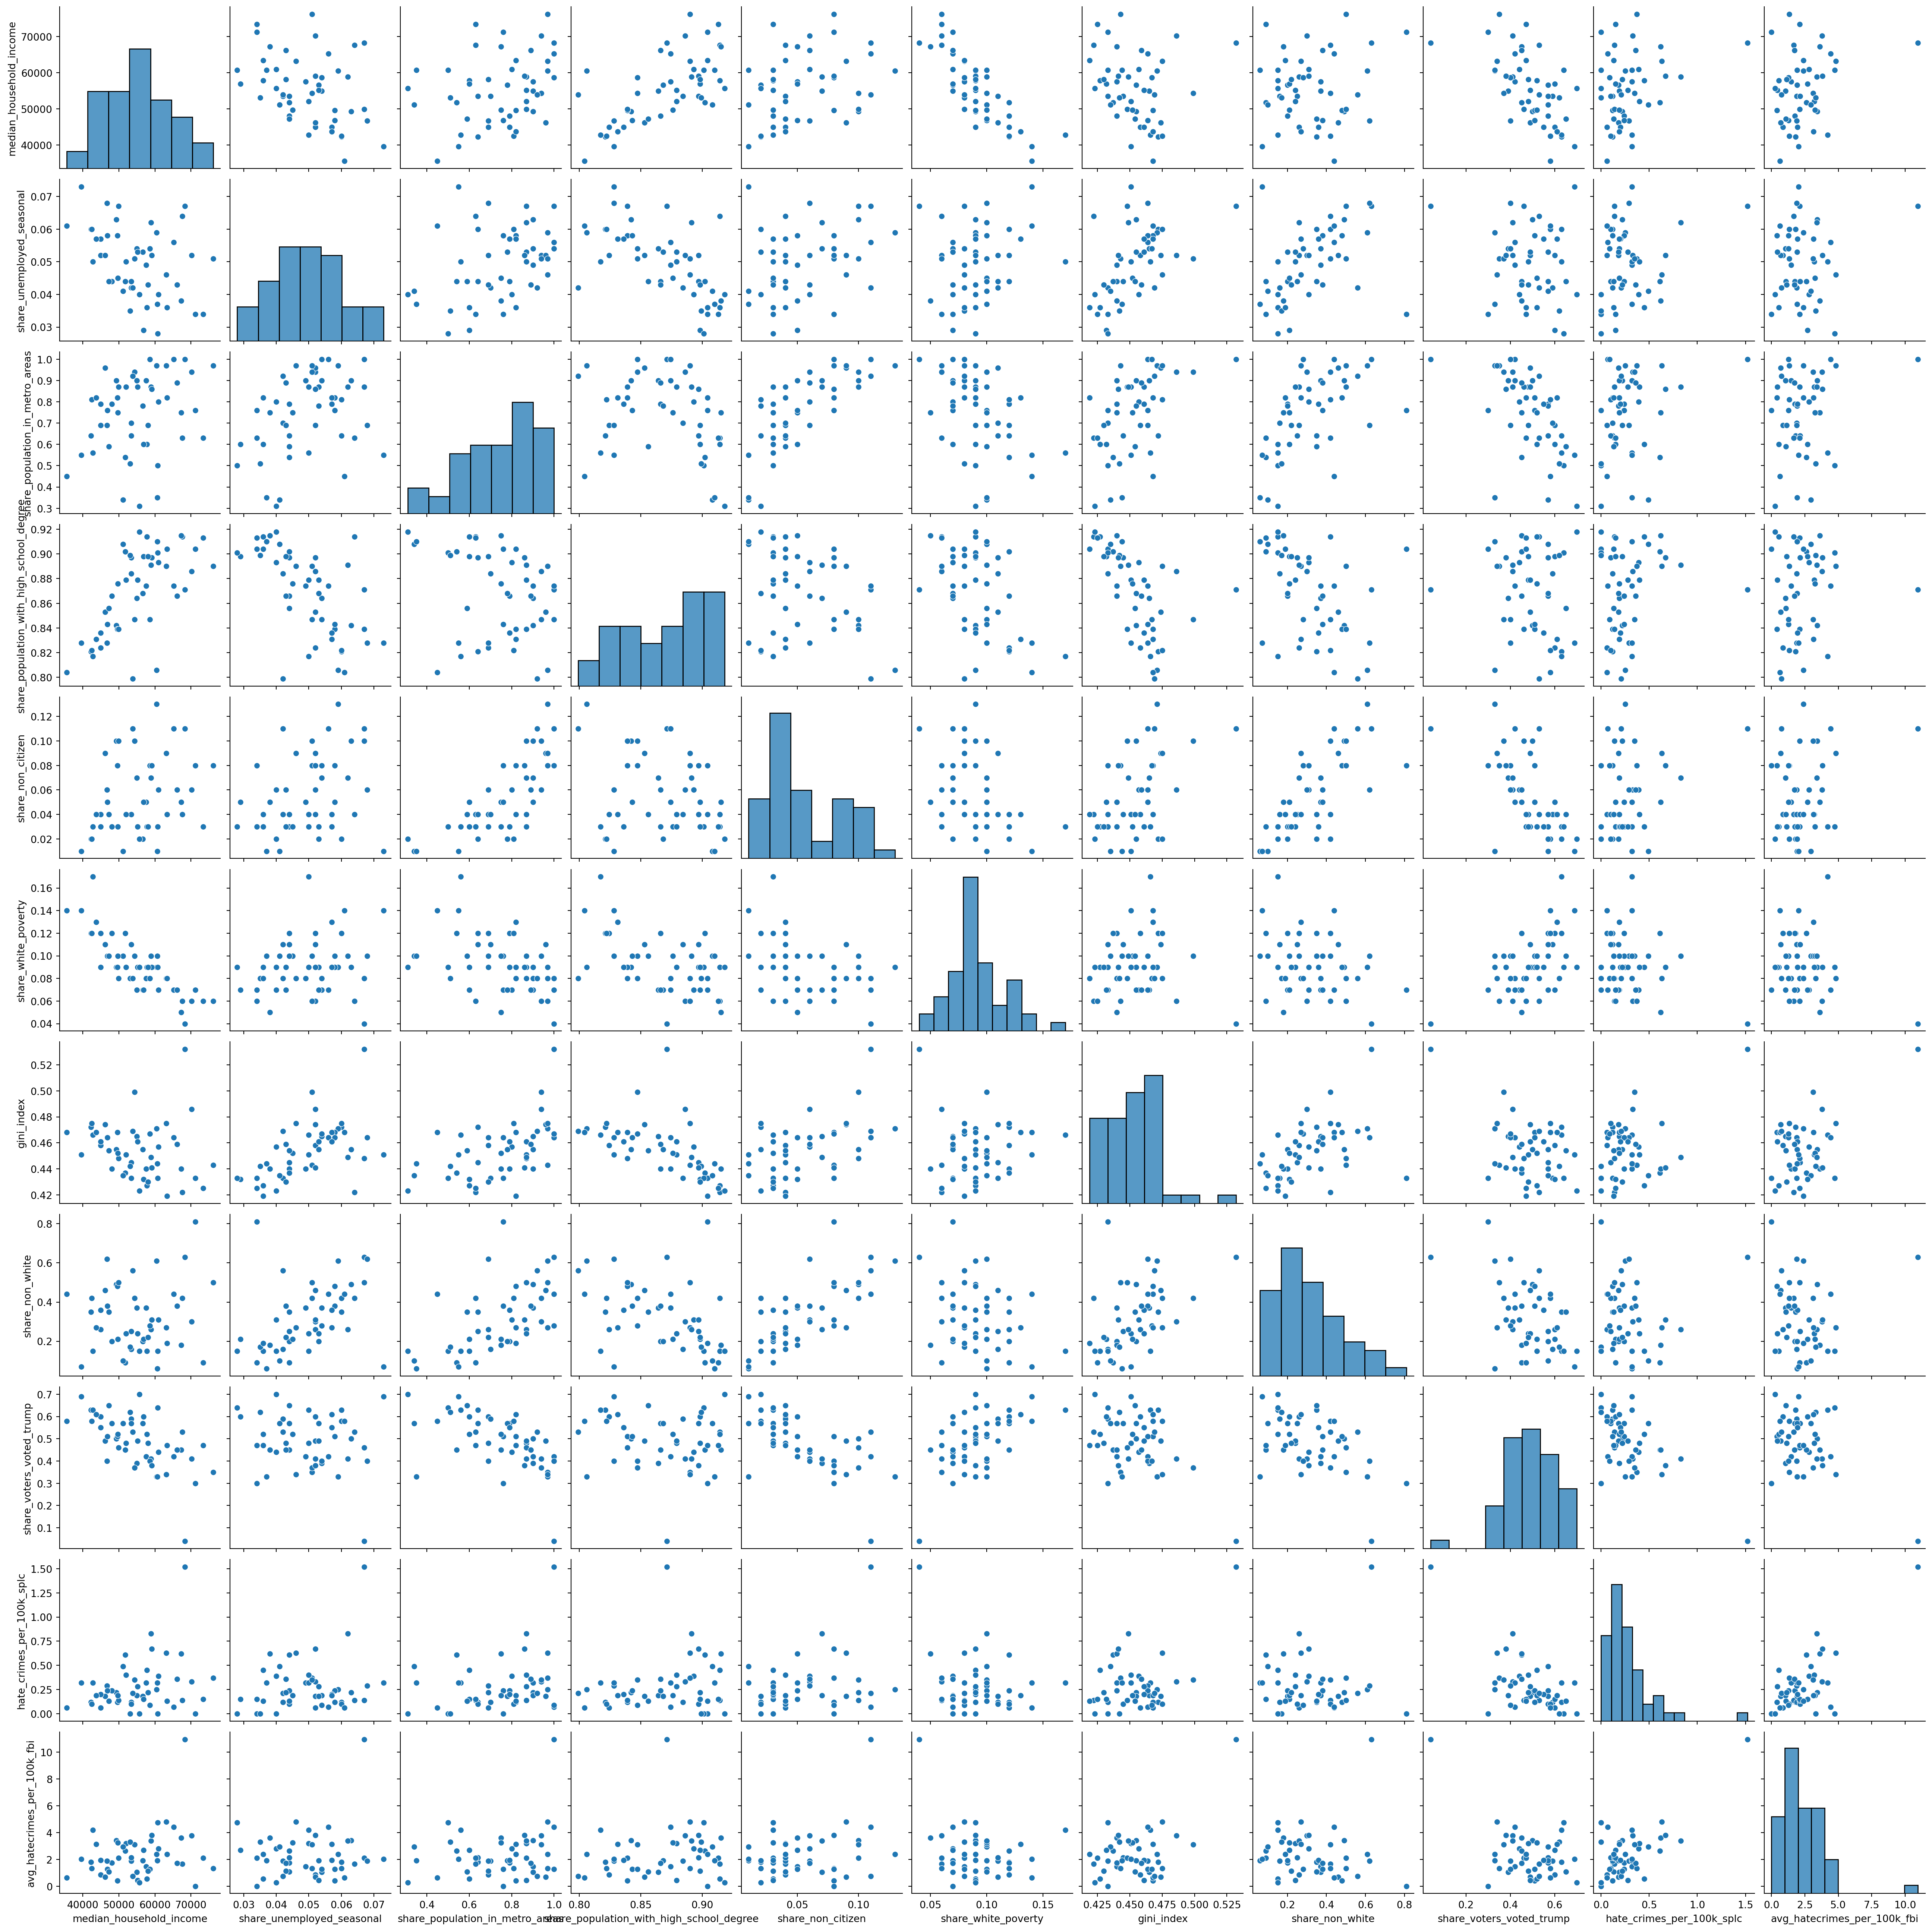

In [14]:
import seaborn as sns
sns.pairplot(data = df.iloc[:,1:])

<Axes: >

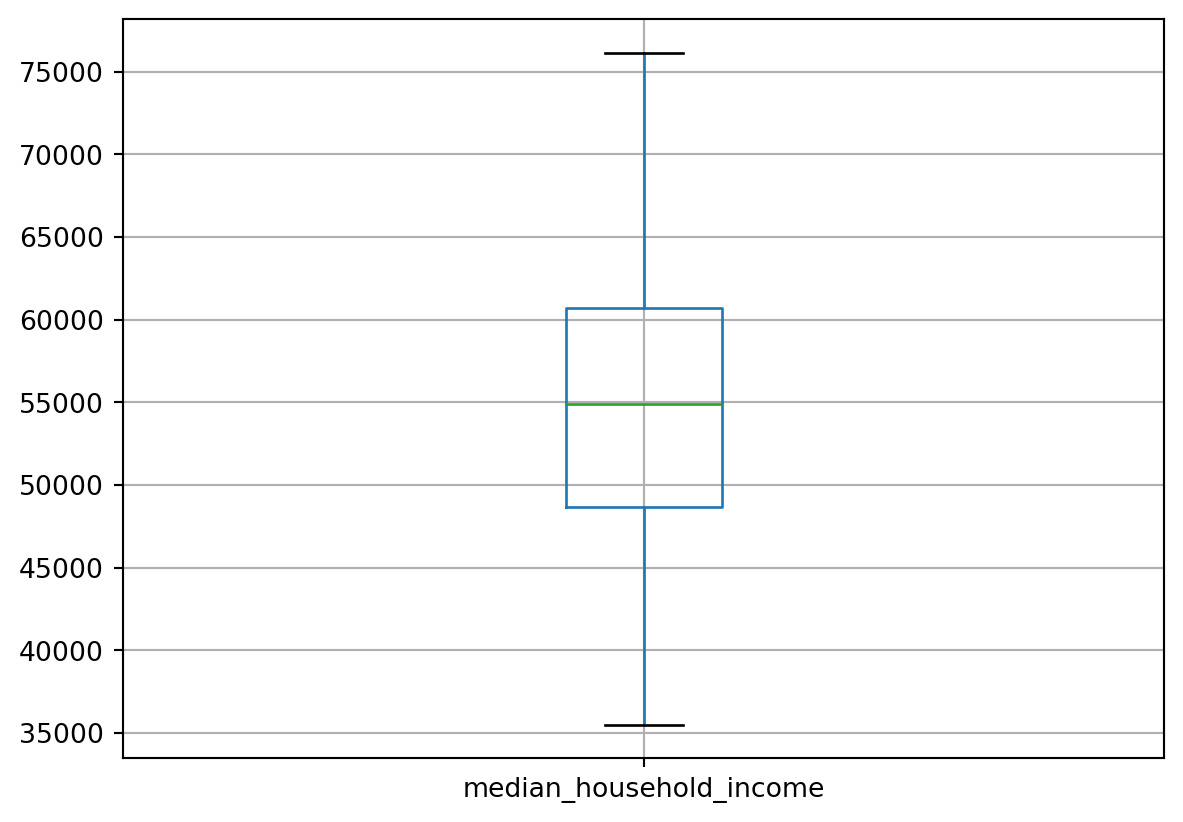

In [15]:
df.boxplot(column=['median_household_income'])

<Axes: >

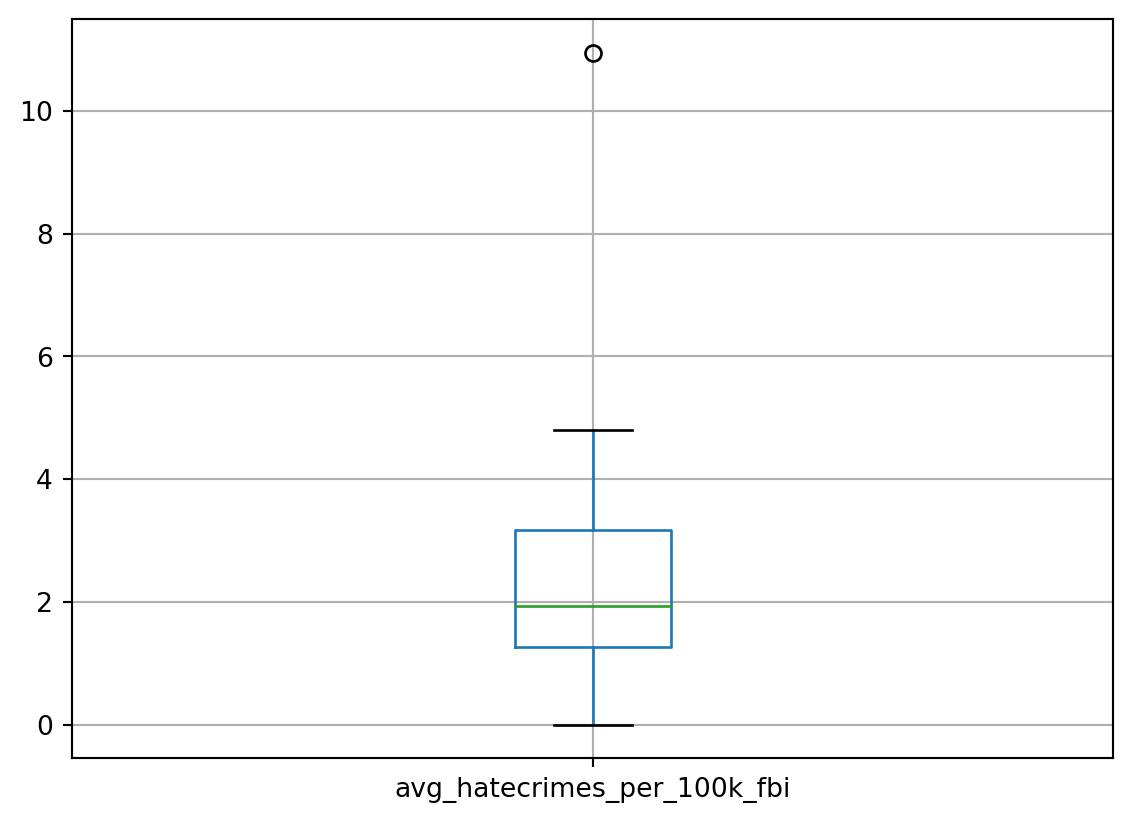

In [16]:
df.boxplot(column=['avg_hatecrimes_per_100k_fbi'])

We may want to drop columns (remove them). Details are [here](https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/).

Let us drop Hawaii.

In [17]:
df[df.NAME == 'Hawaii']

NAME  median_household_income  share_unemployed_seasonal  \
11  Hawaii                    71223                      0.034   

    share_population_in_metro_areas  share_population_with_high_school_degree  \
11                             0.76                                     0.904   

    share_non_citizen  share_white_poverty  gini_index  share_non_white  \
11               0.08                 0.07       0.433             0.81   

    share_voters_voted_trump  hate_crimes_per_100k_splc  \
11                       0.3                        0.0   

    avg_hatecrimes_per_100k_fbi  
11                          0.0

In [18]:
df = df.drop(df.index[11])

In [19]:
df.describe()

median_household_income  share_unemployed_seasonal  \
count                50.000000                  50.000000   
mean              54903.620000                   0.049880   
std                9010.994814                   0.010571   
min               35521.000000                   0.028000   
25%               48358.500000                   0.042250   
50%               54613.000000                   0.051000   
75%               60652.750000                   0.057750   
max               76165.000000                   0.073000   

       share_population_in_metro_areas  \
count                        50.000000   
mean                          0.750000   
std                           0.183425   
min                           0.310000   
25%                           0.630000   
50%                           0.790000   
75%                           0.897500   
max                           1.000000   

       share_population_with_high_school_degree  share_non_citizen  \
count                                 50.000000          47.000000   
mean                                   0.868420           0.054043   
std                                    0.034049           0.031184   
min                                    0.799000           0.010000   
25%                                    0.839750           0.030000   
50%                                    0.874000           0.040000   
75%                                    0.897750           0.080000   
max                                    0.918000           0.130000   

       share_white_poverty  gini_index  share_non_white  \
count            50.000000   50.000000        50.000000   
mean              0.092200    0.454180         0.305800   
std               0.024767    0.020889         0.150551   
min               0.040000    0.419000         0.060000   
25%               0.080000    0.440000         0.192500   
50%               0.090000    0.454500         0.275000   
75%               0.100000    0.466750         0.420000   
max               0.170000    0.532000         0.630000   

       share_voters_voted_trump  hate_crimes_per_100k_splc  \
count                  50.00000                  50.000000   
mean                    0.49380                   0.281200   
std                     0.11674                   0.255779   
min                     0.04000                   0.000000   
25%                     0.42000                   0.130000   
50%                     0.49500                   0.215000   
75%                     0.57750                   0.345000   
max                     0.70000                   1.520000   

       avg_hatecrimes_per_100k_fbi  
count                    50.000000  
mean                      2.363200  
std                       1.714502  
min                       0.260000  
25%                       1.290000  
50%                       1.980000  
75%                       3.182500  
max                      10.950000

<Axes: xlabel='avg_hatecrimes_per_100k_fbi', ylabel='median_household_income'>

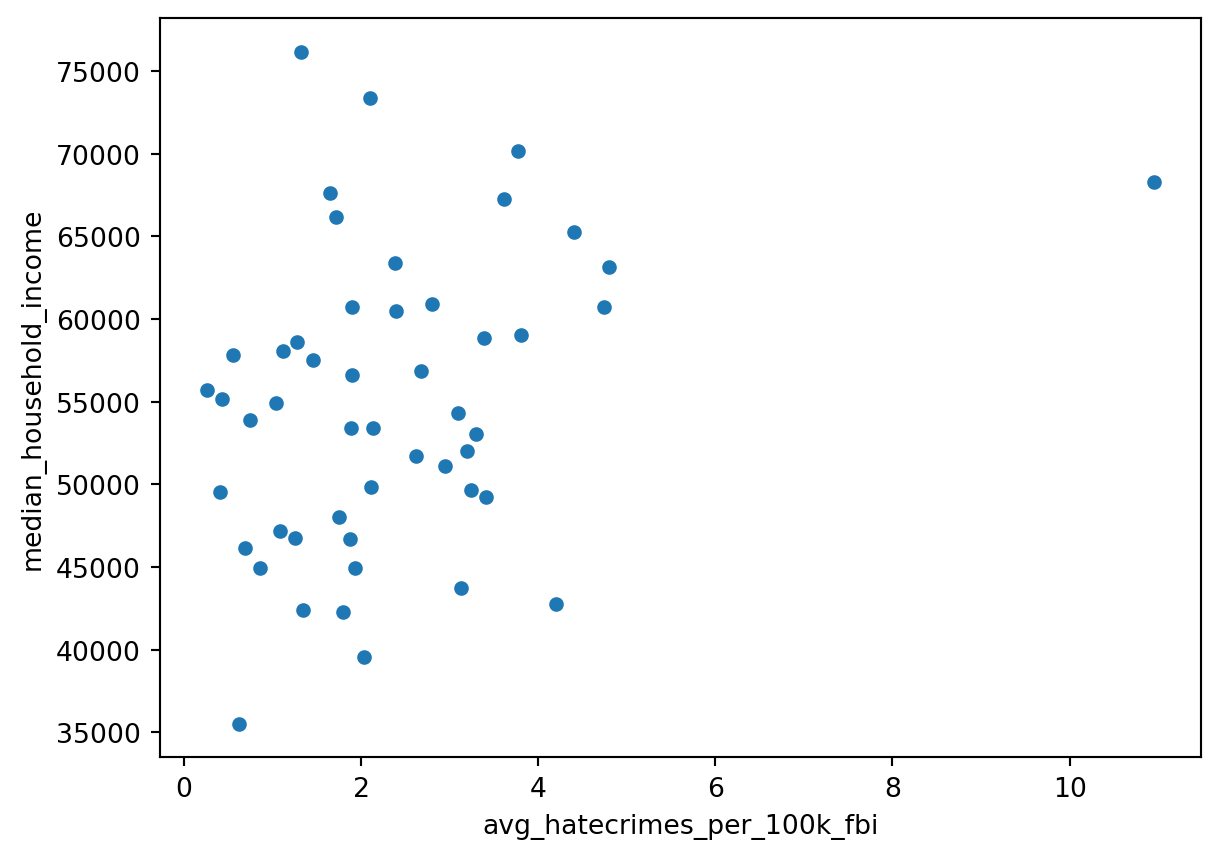

In [20]:
df.plot(x = 'avg_hatecrimes_per_100k_fbi', y = 'median_household_income', kind='scatter')

<Axes: xlabel='hate_crimes_per_100k_splc', ylabel='median_household_income'>

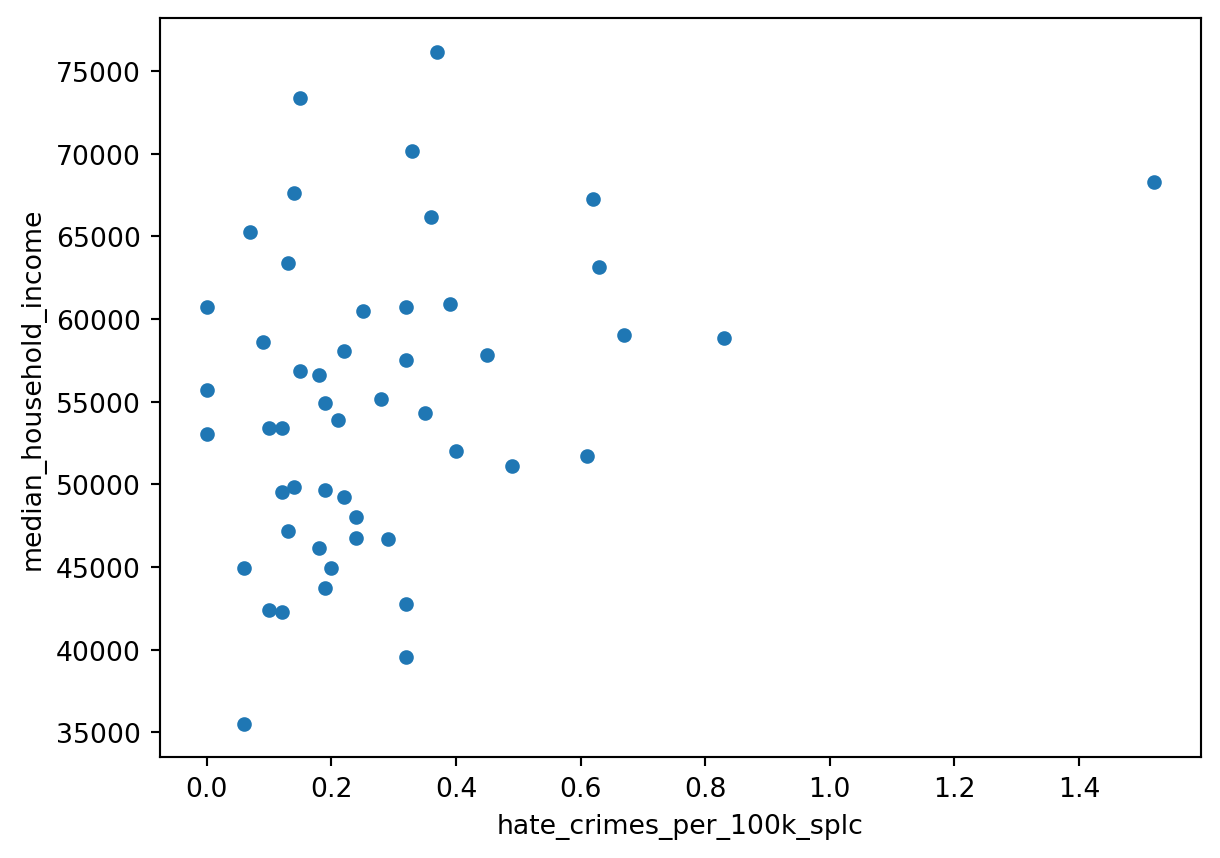

In [21]:
df.plot(x = 'hate_crimes_per_100k_splc', y = 'median_household_income', kind='scatter')

In [22]:
df[df.hate_crimes_per_100k_splc > (np.std(df.hate_crimes_per_100k_splc) * 2.5)]

NAME  median_household_income  share_unemployed_seasonal  \
8   District of Columbia                    68277                      0.067   
37                Oregon                    58875                      0.062   
47            Washington                    59068                      0.052   

    share_population_in_metro_areas  share_population_with_high_school_degree  \
8                              1.00                                     0.871   
37                             0.87                                     0.891   
47                             0.86                                     0.897   

    share_non_citizen  share_white_poverty  gini_index  share_non_white  \
8                0.11                 0.04       0.532             0.63   
37               0.07                 0.10       0.449             0.26   
47               0.08                 0.09       0.441             0.31   

    share_voters_voted_trump  hate_crimes_per_100k_splc  \
8                       0.04                       1.52   
37                      0.41                       0.83   
47                      0.38                       0.67   

    avg_hatecrimes_per_100k_fbi  
8                         10.95  
37                         3.39  
47                         3.81

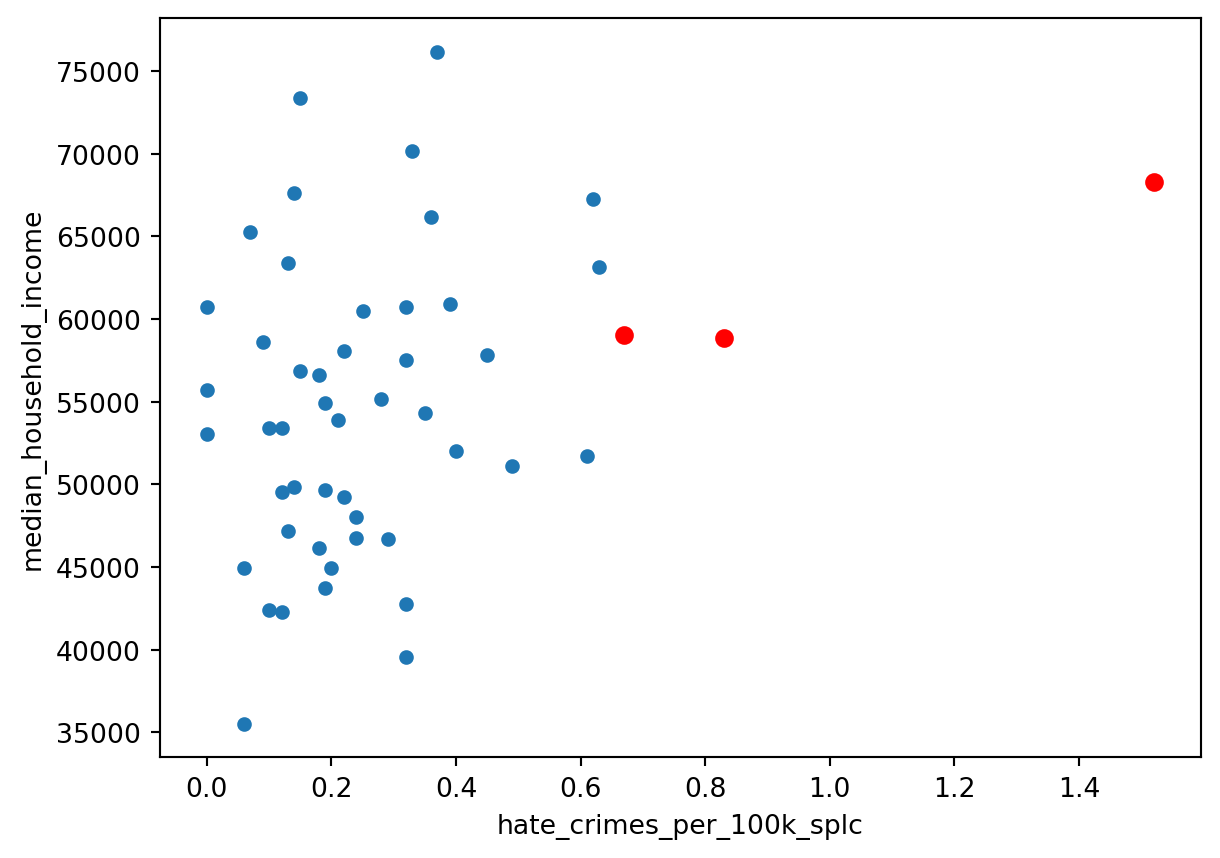

In [23]:
import matplotlib.pyplot as plt
outliers_df = df[df.hate_crimes_per_100k_splc > (np.std(df.hate_crimes_per_100k_splc) * 2.5)]
df.plot(x = 'hate_crimes_per_100k_splc', y = 'median_household_income', kind='scatter')

plt.scatter(outliers_df.hate_crimes_per_100k_splc, outliers_df.median_household_income ,c='red')

In [24]:
df_pivot = df.pivot_table(index=['NAME'], values=['hate_crimes_per_100k_splc', 'avg_hatecrimes_per_100k_fbi', 'median_household_income'])
df_pivot

##sort by values
#df_pivot = pd.pivot_table(df, index=['state'], columns = ['hate_crimes_per_100k_splc'], fill_value=0)
#df_pivot
#df2 = df_pivot.reindex(df_pivot['hate_crimes_per_100k_splc'].sort_values(by='hate_crimes_per_100k_splc', ascending=False).index)


avg_hatecrimes_per_100k_fbi  hate_crimes_per_100k_splc  \
NAME                                                                           
Alabama                                      1.80                       0.12   
Alaska                                       1.65                       0.14   
Arizona                                      3.41                       0.22   
Arkansas                                     0.86                       0.06   
California                                   2.39                       0.25   
Colorado                                     2.80                       0.39   
Connecticut                                  3.77                       0.33   
Delaware                                     1.46                       0.32   
District of Columbia                        10.95                       1.52   
Florida                                      0.69                       0.18   
Georgia                                      0.41                       0.12   
Idaho                                        1.89                       0.12   
Illinois                                     1.04                       0.19   
Indiana                                      1.75                       0.24   
Iowa                                         0.56                       0.45   
Kansas                                       2.14                       0.10   
Kentucky                                     4.20                       0.32   
Louisiana                                    1.34                       0.10   
Maine                                        2.62                       0.61   
Maryland                                     1.32                       0.37   
Massachusetts                                4.80                       0.63   
Michigan                                     3.20                       0.40   
Minnesota                                    3.61                       0.62   
Mississippi                                  0.62                       0.06   
Missouri                                     1.90                       0.18   
Montana                                      2.95                       0.49   
Nebraska                                     2.68                       0.15   
Nevada                                       2.11                       0.14   
New Hampshire                                2.10                       0.15   
New Jersey                                   4.41                       0.07   
New Mexico                                   1.88                       0.29   
New York                                     3.10                       0.35   
North Carolina                               1.26                       0.24   
North Dakota                                 4.74                       0.00   
Ohio                                         3.24                       0.19   
Oklahoma                                     1.08                       0.13   
Oregon                                       3.39                       0.83   
Pennsylvania                                 0.43                       0.28   
Rhode Island                                 1.28                       0.09   
South Carolina                               1.93                       0.20   
South Dakota                                 3.30                       0.00   
Tennessee                                    3.13                       0.19   
Texas                                        0.75                       0.21   
Utah                                         2.38                       0.13   
Vermont                                      1.90                       0.32   
Virginia                                     1.72                       0.36   
Washington                                   3.81                       0.67   
West Virginia                                2.03                       0.32   
Wisconsin             

In [25]:
df_pivot.sort_values(by=['avg_hatecrimes_per_100k_fbi'], ascending=False)

avg_hatecrimes_per_100k_fbi  hate_crimes_per_100k_splc  \
NAME                                                                           
District of Columbia                        10.95                       1.52   
Massachusetts                                4.80                       0.63   
North Dakota                                 4.74                       0.00   
New Jersey                                   4.41                       0.07   
Kentucky                                     4.20                       0.32   
Washington                                   3.81                       0.67   
Connecticut                                  3.77                       0.33   
Minnesota                                    3.61                       0.62   
Arizona                                      3.41                       0.22   
Oregon                                       3.39                       0.83   
South Dakota                                 3.30                       0.00   
Ohio                                         3.24                       0.19   
Michigan                                     3.20                       0.40   
Tennessee                                    3.13                       0.19   
New York                                     3.10                       0.35   
Montana                                      2.95                       0.49   
Colorado                                     2.80                       0.39   
Nebraska                                     2.68                       0.15   
Maine                                        2.62                       0.61   
California                                   2.39                       0.25   
Utah                                         2.38                       0.13   
Kansas                                       2.14                       0.10   
Nevada                                       2.11                       0.14   
New Hampshire                                2.10                       0.15   
West Virginia                                2.03                       0.32   
South Carolina                               1.93                       0.20   
Vermont                                      1.90                       0.32   
Missouri                                     1.90                       0.18   
Idaho                                        1.89                       0.12   
New Mexico                                   1.88                       0.29   
Alabama                                      1.80                       0.12   
Indiana                                      1.75                       0.24   
Virginia                                     1.72                       0.36   
Alaska                                       1.65                       0.14   
Delaware                                     1.46                       0.32   
Louisiana                                    1.34                       0.10   
Maryland                                     1.32                       0.37   
Rhode Island                                 1.28                       0.09   
North Carolina                               1.26                       0.24   
Wisconsin                                    1.12                       0.22   
Oklahoma                                     1.08                       0.13   
Illinois                                     1.04                       0.19   
Arkansas                                     0.86                       0.06   
Texas                                        0.75                       0.21   
Florida                                      0.69                       0.18   
Mississippi                                  0.62                       0.06   
Iowa                                         0.56                       0.45   
Pennsylvania                                 0.43                       0.28   
Georgia               

In [26]:
#This is code for standarization  
from sklearn import preprocessing
import numpy as np

#Get column names first
#names = df.columns
#df_stand = df[['median_household_income','share_unemployed_seasonal']]
df_stand = df[['median_household_income','share_unemployed_seasonal', 'share_population_in_metro_areas'
               , 'share_population_with_high_school_degree', 'share_non_citizen', 'share_white_poverty', 'gini_index'
               , 'share_non_white', 'share_voters_voted_trump', 'hate_crimes_per_100k_splc', 'avg_hatecrimes_per_100k_fbi']]
names = df_stand.columns
#Create the Scaler object
scaler = preprocessing.StandardScaler()
#Fit your data on the scaler object
df2 = scaler.fit_transform(df_stand)
df2 = pd.DataFrame(df2, columns=names)
df2.tail()


median_household_income  share_unemployed_seasonal  \
45                 1.261305                  -0.657461   
46                 0.466836                   0.202590   
47                -1.720951                   2.209376   
48                 0.356079                  -0.657461   
49                 0.088155                  -0.944145   

    share_population_in_metro_areas  share_population_with_high_school_degree  \
45                         0.771002                                 -0.071795   
46                         0.605787                                  0.847894   
47                        -1.101431                                 -1.199157   
48                        -0.330429                                  0.877562   
49                        -2.423149                                  1.470910   

    share_non_citizen  share_white_poverty  gini_index  share_non_white  \
45           0.193108            -0.905436    0.233085         0.497859   
46           0.841399            -0.089728   -0.637357         0.028181   
47          -1.427620             1.949543   -0.153778        -1.582146   
48          -0.779329            -0.089728   -1.169293        -0.575692   
49          -1.103475            -0.089728   -1.507798        -1.045370   

    share_voters_voted_trump  hate_crimes_per_100k_splc  \
45                 -0.379003                   0.311206   
46                 -0.984716                   1.535493   
47                  1.697727                   0.153233   
48                 -0.119412                  -0.241698   
49                  1.784258                  -1.110547   

    avg_hatecrimes_per_100k_fbi  
45                    -0.378961  
46                     0.852428  
47                    -0.196315  
48                    -0.732470  
49                    -1.239166

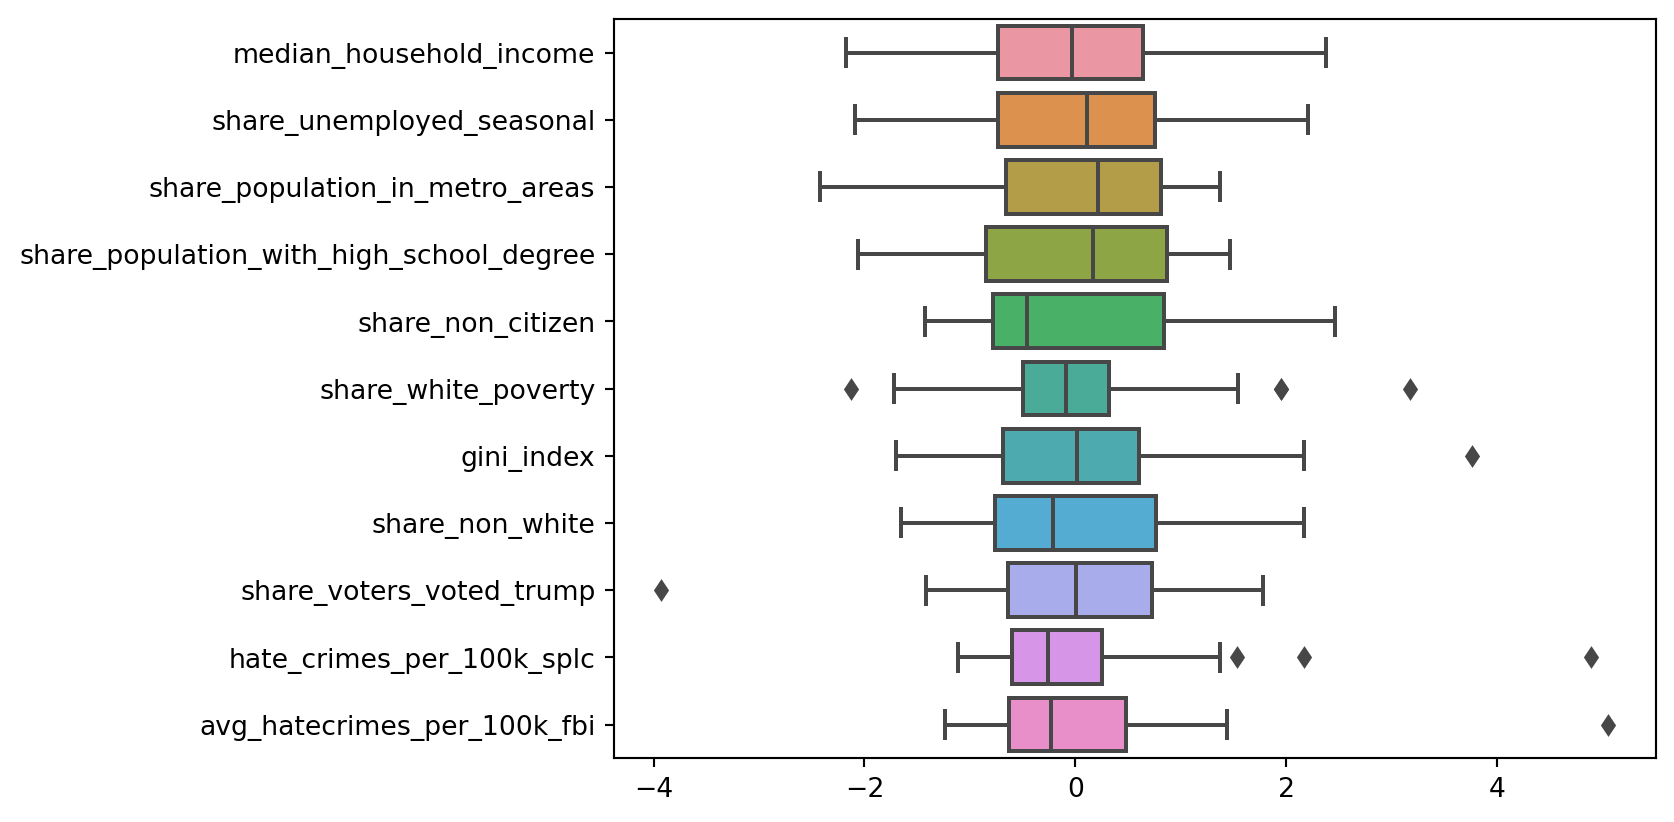

In [27]:
ax = sns.boxplot(data=df2, orient="h")

In [28]:
#wanted to remove row with Hawaii (row nr 11) following https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/

df2 = df.copy()
df2
#df2.drop('Hawaii')
#df2.drop(11) #drop Hawaii row
df2.drop(df.index[11])
df2.tail()


NAME  median_household_income  share_unemployed_seasonal  \
46       Virginia                    66155                      0.043   
47     Washington                    59068                      0.052   
48  West Virginia                    39552                      0.073   
49      Wisconsin                    58080                      0.043   
50        Wyoming                    55690                      0.040   

    share_population_in_metro_areas  share_population_with_high_school_degree  \
46                             0.89                                     0.866   
47                             0.86                                     0.897   
48                             0.55                                     0.828   
49                             0.69                                     0.898   
50                             0.31                                     0.918   

    share_non_citizen  share_white_poverty  gini_index  share_non_white  \
46               0.06                 0.07       0.459             0.38   
47               0.08                 0.09       0.441             0.31   
48               0.01                 0.14       0.451             0.07   
49               0.03                 0.09       0.430             0.22   
50               0.02                 0.09       0.423             0.15   

    share_voters_voted_trump  hate_crimes_per_100k_splc  \
46                      0.45                       0.36   
47                      0.38                       0.67   
48                      0.69                       0.32   
49                      0.48                       0.22   
50                      0.70                       0.00   

    avg_hatecrimes_per_100k_fbi  
46                         1.72  
47                         3.81  
48                         2.03  
49                         1.12  
50                         0.26

In [29]:
import scipy.stats
#instead of running it one by one for every pair of variables, like:
#scipy.stats.pearsonr(st_wine.quality.values, st_wine.alcohol.values) 

corrMatrix = df2.corr(numeric_only=True).round(2)
print (corrMatrix)

                                          median_household_income  \
median_household_income                                      1.00   
share_unemployed_seasonal                                   -0.34   
share_population_in_metro_areas                              0.29   
share_population_with_high_school_degree                     0.64   
share_non_citizen                                            0.28   
share_white_poverty                                         -0.82   
gini_index                                                  -0.15   
share_non_white                                             -0.00   
share_voters_voted_trump                                    -0.57   
hate_crimes_per_100k_splc                                    0.33   
avg_hatecrimes_per_100k_fbi                                  0.32   

                                          share_unemployed_seasonal  \
median_household_income                                       -0.34   
share_unemployed_seasonal    

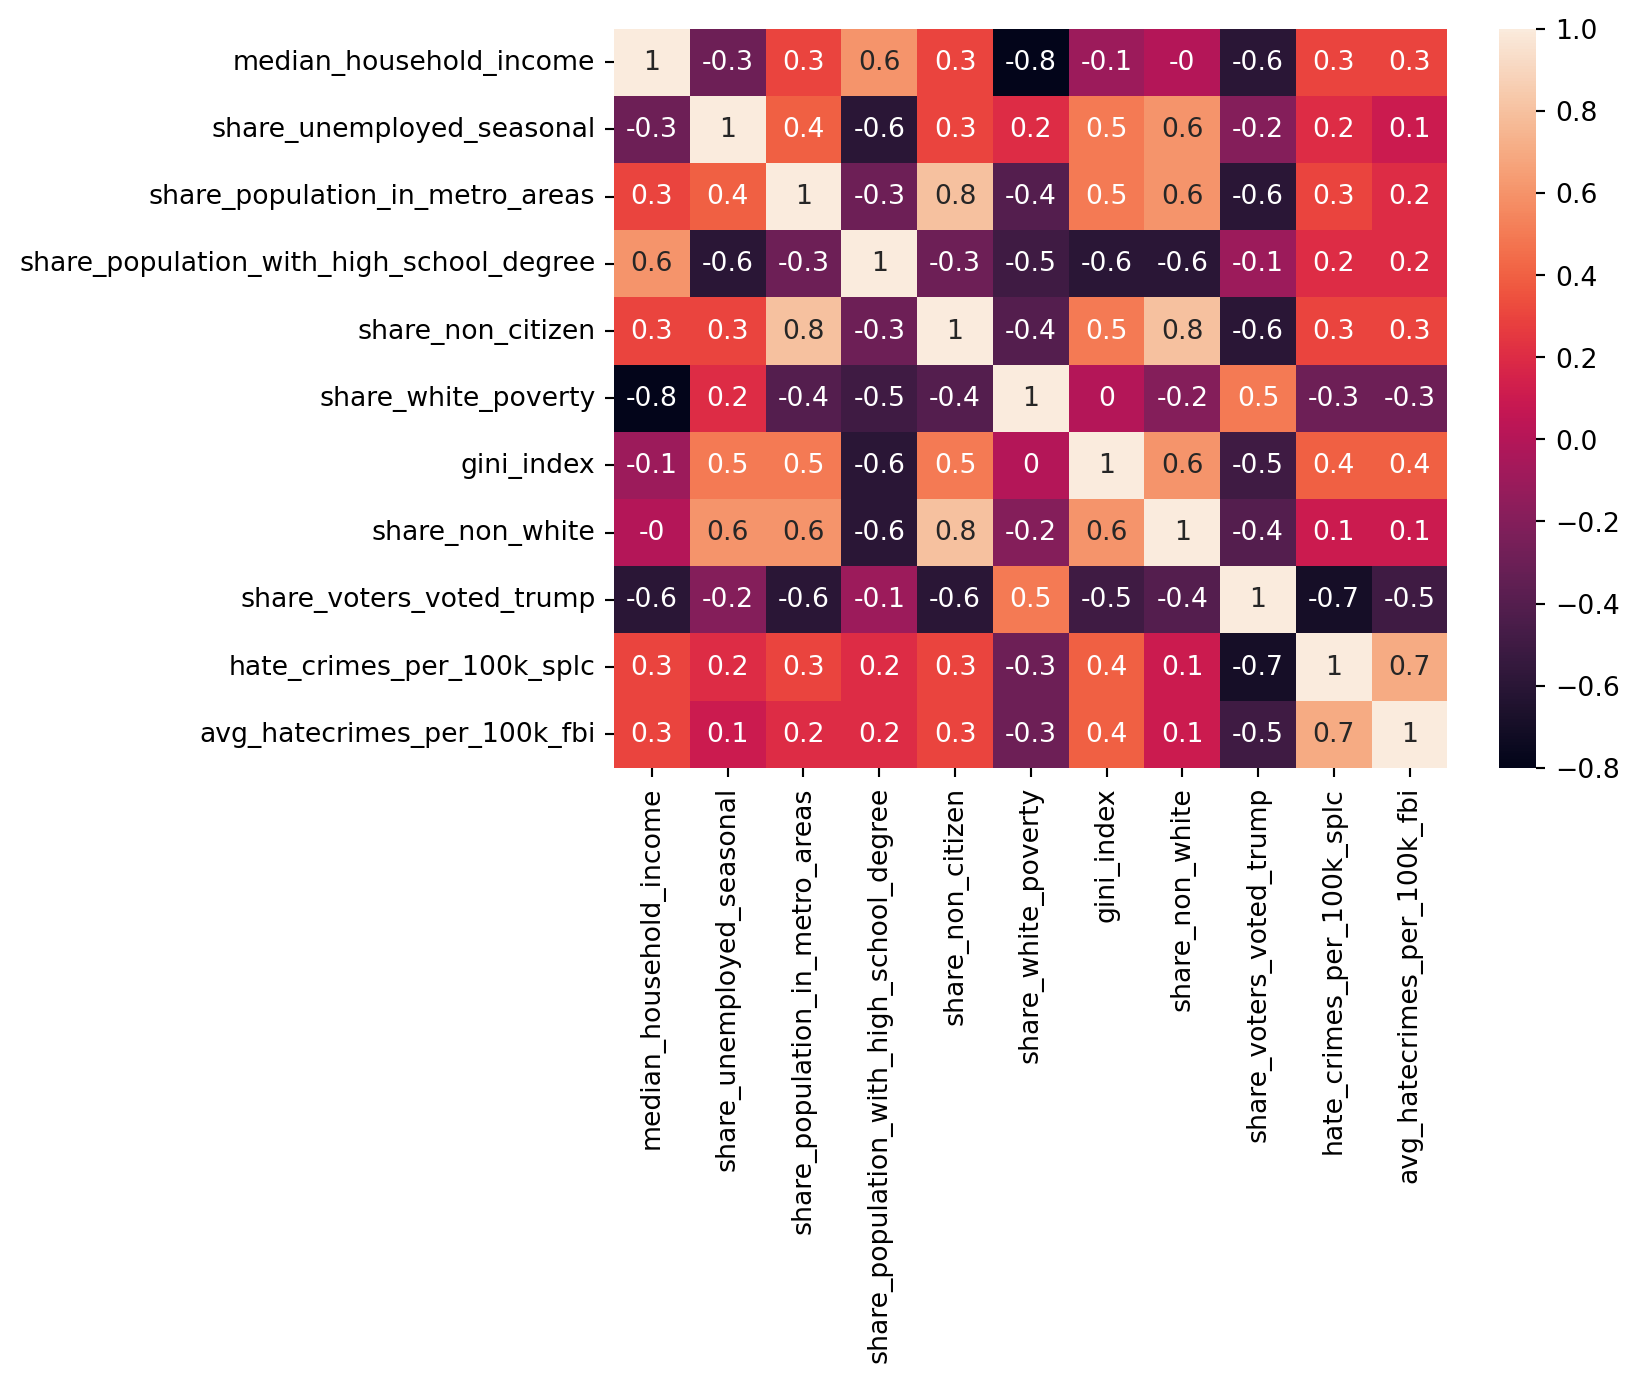

In [30]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = df2.corr(numeric_only=True).round(1)  #I added here ".round(1)" so that's easier to read given number of variables
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [31]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics

x = df2[['median_household_income', 'share_population_with_high_school_degree', 'share_voters_voted_trump']]
y = df2[['avg_hatecrimes_per_100k_fbi']]
#what if we change the y variable
#y = df2[['hate_crimes_per_100k_splc']]

est = LinearRegression(fit_intercept = True) 
est.fit(x, y)

print("Coefficients:", est.coef_)
print ("Intercept:", est.intercept_)

model = LinearRegression()
model.fit(x, y)
y_hat = model.predict(x)
print ("MSE:", metrics.mean_squared_error(y, y_hat))
print ("R^2:", metrics.r2_score(y, y_hat))
print ("var:", y.var())


Coefficients: [[-1.63935828e-05  7.65352737e+00 -7.85302986e+00]]
Intercept: [0.49461694]
MSE: 2.1105276140605045
R^2: 0.26736253642536767
var: avg_hatecrimes_per_100k_fbi    2.939516
dtype: float64
